In [1]:
import numpy as np
import os
import struct
from matplotlib import pyplot
import matplotlib as plt
import matplotlib.pyplot as plt
import time
import datetime as dt
import sklearn

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
#fetch original mnist dataset
from sklearn.datasets import fetch_mldata

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, pipeline
from sklearn.kernel_approximation import (RBFSampler, Nystroem)
from sklearn.decomposition import PCA

In [2]:
def load_MNIST(dataset = "training", path = ".", digits=[]):
    """
    Python function for importing the MNIST data set.  It returns two Numpy array
    one with flattened feature vectors and one with the label of the digit.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")
        
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
    get_img = lambda idx: (lbl[idx], img[idx])

    data = []
    for i in range(len(lbl)):
        data.append(get_img(i))
    
    X = []
    y = []

    for digit, data in filter(lambda x: x[0] in digits, data):
        X.append(data.flatten())
        y.append(digit)
        
    return np.array(X), np.array(y)

In [3]:
#I chose two numbers 1 and 9 
two_numbers = [1, 9]

#X_train is data and y_train are the labels for training data
X_train, y_train  =load_MNIST(dataset = "training", path = ".", digits=two_numbers)

#X_test is data and y_test are the labels for test data
X_test, y_test  = load_MNIST(dataset = "testing", path = ".", digits=two_numbers)

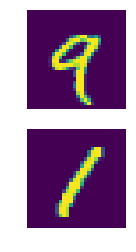

In [4]:
#plotting some images
%matplotlib inline
fig = pyplot.figure()
ax = fig.add_subplot(2,1,1)
imgplot = ax.imshow(X_train[1].reshape((28, 28)))
pyplot.axis('off')

ax2=  fig.add_subplot(2,1,2)
imgplot = ax2.imshow(X_train[0].reshape((28, 28)))
pyplot.axis('off')
pyplot.show()

In [ ]:
#SVC using linear kernel 

In [10]:
kernel_svm = svm.SVC(gamma=.2) #rbf used by default
linear_svm = svm.LinearSVC()

# create pipeline from kernel approximation and linear svm

feature_map_fourier = RBFSampler(gamma=.2, random_state=1)
feature_map_nystroem = Nystroem(gamma=.2, random_state=1)

fourier_approx_svm = pipeline.Pipeline([("feature_map", feature_map_fourier),
                                        ("svm", svm.LinearSVC())])

nystroem_approx_svm = pipeline.Pipeline([("feature_map", feature_map_nystroem),
                                        ("svm", svm.LinearSVC())])

In [6]:
import datetime as dt

linear_svm_start_time = dt.datetime.now()
print 'Start linear svm learning at {}'.format(str(linear_svm_start_time))
linear_svm.fit(X_train, y_train)
linear_svm_end_time = dt.datetime.now()
elapsed_time = linear_svm_end_time - linear_svm_start_time
print 'End linear svm learning at {}'.format(str(linear_svm_end_time))
print 'Elapsed learning {}'.format(str(elapsed_time))

Start linear svm learning at 2018-10-28 13:22:43.877883
End linear svm learning at 2018-10-28 13:22:44.078806
Elapsed learning 0:00:00.200923


/Users/ewa_anna_szyszka/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
import pandas as pd
# Create a classifier: a support vector classifier
classifier = svm.SVC(C=200,gamma=0.01,kernel='linear',cache_size=8000,probability=False)
#classifier = svm.SVC()

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
#expected = label_test
predicted = classifier.predict(X_test)

#print(expected)
df=pd.DataFrame(predicted)
df.index+=1
df.index.name='ImageId'
df.columns=['Label']
df.to_csv('results.csv',header=True)
print(predicted)

[1 1 9 ... 1 9 1]


In [ ]:
#error rates on the testing dataset for linear kernel
classifier.score(X_test, y_test)

In [ ]:
#SVC using rbf kernel 

In [12]:
kernel_svm_start_time = dt.datetime.now()
print 'Start kernel svm learning at {}'.format(str(kernel_svm_start_time))
kernel_svm.fit(X_train, y_train)
kernel_svm_end_time = dt.datetime.now()
elapsed_time = kernel_svm_end_time - kernel_svm_start_time
print 'End kernel svm learning at {}'.format(str(kernel_svm_end_time))
print 'Elapsed learning {}'.format(str(elapsed_time))

kernel_svm_start_time = dt.datetime.now()
kernel_svm_score = kernel_svm.score(X_test, y_test)
elapsed_time = dt.datetime.now() - kernel_svm_start_time
print 'Prediction takes {}'.format(str(elapsed_time))

Start kernel svm learning at 2018-10-28 13:37:06.796911
End kernel svm learning at 2018-10-28 13:42:08.961942
Elapsed learning 0:05:02.165031
Prediction takes 0:00:19.727747


In [16]:
import pandas as pd
# Create a classifier: a support vector classifier
classifier = svm.SVC(C=200,kernel='rbf',gamma=0.01,cache_size=8000,probability=False)
#classifier = svm.SVC()

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
#expected = label_test
predicted = classifier.predict(X_test)

#print(expected)
df=pd.DataFrame(predicted)
df.index+=1
df.index.name='ImageId'
df.columns=['Label']
df.to_csv('results.csv',header=True)
print(predicted)

[1 1 1 ... 1 1 1]


In [ ]:
#error rates on the testing dataset for rbf kernel
classifier.score(X_test, y_test)

In [ ]:
#SVC using poly kernel 

In [18]:
kernelpoly_svm = svm.SVC(kernel='poly', gamma = 'auto')

kernelpoly_svm_start_time = dt.datetime.now()
print 'Start kernel svm learning at {}'.format(str(kernelpoly_svm_start_time))
kernelpoly_svm.fit(X_train, y_train)
kernelpoly_svm_end_time = dt.datetime.now()
elapsed_time = kernelpoly_svm_end_time - kernelpoly_svm_start_time
print 'End kernel svm learning at {}'.format(str(kernelpoly_svm_end_time))
print 'Elapsed learning {}'.format(str(elapsed_time))

kernelpoly_svm_start_time = dt.datetime.now()
kernelpoly_svm_score = kernelpoly_svm.score(X_test, y_test)
elapsed_time = dt.datetime.now() - kernelpoly_svm_start_time
print 'Prediction takes {}'.format(str(elapsed_time))

Start kernel svm learning at 2018-10-28 13:54:03.913777
End kernel svm learning at 2018-10-28 13:54:06.842008
Elapsed learning 0:00:02.928231
Prediction takes 0:00:00.453233


In [19]:
import pandas as pd
# Create a classifier: a support vector classifier
classifier = svm.SVC(C=200,kernel='poly',gamma=0.01,cache_size=8000,probability=False)
#classifier = svm.SVC()


# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
#expected = label_test
predicted = classifier.predict(X_test)

#print(expected)
df=pd.DataFrame(predicted)
df.index+=1
df.index.name='ImageId'
df.columns=['Label']
df.to_csv('results.csv',header=True)
print(predicted)

[1 1 9 ... 1 9 1]


In [21]:
#error rates on the testing dataset for poly kernel
classifier.score(X_test, y_test)

0.9967350746268657